In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn import linear_model

In [2]:
data = pd.read_excel("Risk_Factors.xlsx",index_col = "Date")

D:\anaconda\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
portfolio = pd.read_excel("Industry_Portfolios.xlsx",index_col = "Date")

D:\anaconda\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [4]:
Rf = data["Rf"]
Rf = pd.DataFrame(Rf)
Rf

,Rf
Date,
200401,0.07
200402,0.06
200403,0.09
200404,0.08
200405,0.06
...,...
201308,0.00
201309,0.00
201310,0.00


In [5]:
portfolio

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


# 计算Sharpe ratio并画图

In [6]:
#？我们要怎么做，首先思考Sharpe ratio需要什么来进行计算，Sharpe=E(Rp-Rf)/std(Rp-Rf)
#所以我们唯一需要计算的就只有Rp-Rf,下面我们来进行计算

In [7]:
#我们把Rp-Rf命名一个新的dataframe叫excess return
#注意这里要用.values，不然的话减出来就全是non
excess_return = portfolio-Rf.values
excess_return#现在我们有了excess return，我们要计算他们各自行业的mean和std，并生成一个新的dataframe叫sharpe ratio，我们的任务也就完成了

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,-0.01,-1.14,-0.69,0.37,4.46,1.34,0.38,3.02,1.85,2.81
200402,4.19,-0.13,1.89,4.63,-2.98,-0.58,6.03,0.83,2.01,2.10
200403,-0.18,-1.24,-0.36,-0.22,-2.64,-2.16,0.20,-4.05,1.04,-0.72
200404,1.34,2.22,-0.25,2.44,-4.99,-0.56,-2.78,3.46,-3.63,-3.84
200405,-1.95,-1.70,1.55,0.33,4.79,-3.01,0.24,-0.48,1.22,1.80
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [8]:
sharpe = (excess_return.mean())/(excess_return.std())
sharpe_ratio = pd.DataFrame(sharpe,columns=["Sharpe_Ratio"])
sharpe_ratio

,Sharpe_Ratio
NoDur,0.231099
Durbl,0.072356
Manuf,0.166616
Enrgy,0.181708
HiTec,0.118552
Telcm,0.169064
Shops,0.191753
Hlth,0.172529
Utils,0.210948
Other,0.064693


In [9]:
sharpe

NoDur    0.231099
Durbl    0.072356
Manuf    0.166616
Enrgy    0.181708
HiTec    0.118552
Telcm    0.169064
Shops    0.191753
Hlth     0.172529
Utils    0.210948
Other    0.064693
dtype: float64

In [10]:
excess_return.columns

Index(['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec', 'Telcm', 'Shops', 'Hlth',
       'Utils', 'Other'],
      dtype='object')

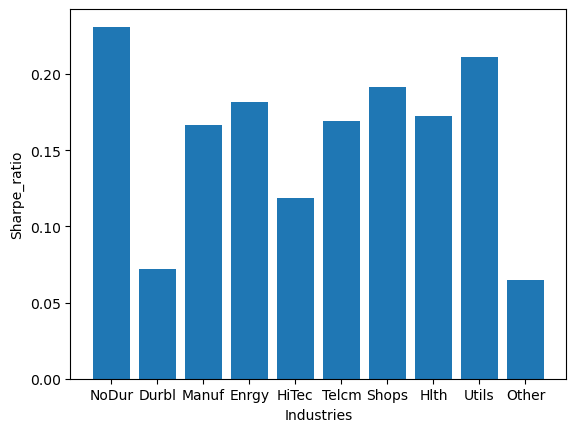

In [11]:
plt.bar(excess_return.columns,sharpe)
plt.xlabel("Industries")
plt.ylabel("Sharpe_ratio")
plt.show()

# 计算Treynor Ratio并画图

In [12]:
#我们首先要知道treynor ratio的计算公式，treynor ratio=E(Rp-Rf)/beta
#这个beta就是我们第二次作业算的那个beta，下面我们开始计算

In [13]:
alpha_beta_table = pd.DataFrame(columns = ['Alpha', 'Beta'])

for i in portfolio.columns:
    slope, intercept, r_value, p_value, std_err = linregress(data['Rm-Rf'],
                                                             excess_return[i])
    
    row_data = [intercept, slope]
    alpha_beta_table.loc[i] = row_data

alpha_beta_table

,Alpha,Beta
NoDur,0.369717,0.653744
Durbl,-0.417903,1.649374
Manuf,0.160494,1.167929
Enrgy,0.504485,0.965527
HiTec,-0.064024,1.132387
Telcm,0.194348,0.901721
Shops,0.274093,0.829515
Hlth,0.236968,0.675890
Utils,0.446523,0.537009
Other,-0.387508,1.206992


In [14]:
#现在我们有了beta，有了rp-rf，我们就可以直接计算了

In [15]:
treynor = (excess_return.mean())/alpha_beta_table["Beta"]
treynor_ratio = pd.DataFrame(treynor,columns=["Treynor_Ratio"])
treynor_ratio

,Treynor_Ratio
NoDur,1.186372
Durbl,0.367463
Manuf,0.758251
Enrgy,1.143330
HiTec,0.564295
Telcm,0.836363
Shops,0.951258
Hlth,0.971435
Utils,1.452334
Other,0.299781


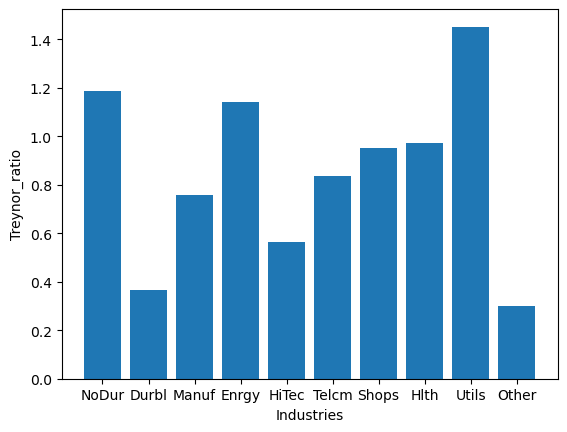

In [16]:
plt.bar(excess_return.columns,treynor)
plt.xlabel("Industries")
plt.ylabel("Treynor_ratio")
plt.show()

# 计算Sortino Ratio并画图

In [17]:
#首先我们要知道sortino ratio的计算方法，sortino ratio=E(Rp-Rf)/downside_std
#那么我们唯一需要计算的就是downside_std

In [18]:
downside = excess_return.copy()
downside[downside>0] = 0
downside

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,-0.01,-1.14,-0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00
200402,0.00,-0.13,0.00,0.00,-2.98,-0.58,0.00,0.00,0.00,0.00
200403,-0.18,-1.24,-0.36,-0.22,-2.64,-2.16,0.00,-4.05,0.00,-0.72
200404,0.00,0.00,-0.25,0.00,-4.99,-0.56,-2.78,0.00,-3.63,-3.84
200405,-1.95,-1.70,0.00,0.00,0.00,-3.01,0.00,-0.48,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
201310,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [35]:
downside_return = (downside*downside).mean()

In [36]:
sortino = (excess_return.mean())/(np.sqrt(downside_return))
sortino_ratio = pd.DataFrame(sortino,columns=["Sortino_Ratio"])
sortino_ratio

,Sortino_Ratio
NoDur,0.350804
Durbl,0.111967
Manuf,0.241260
Enrgy,0.273612
HiTec,0.170620
Telcm,0.244940
Shops,0.293032
Hlth,0.270294
Utils,0.290044
Other,0.087351


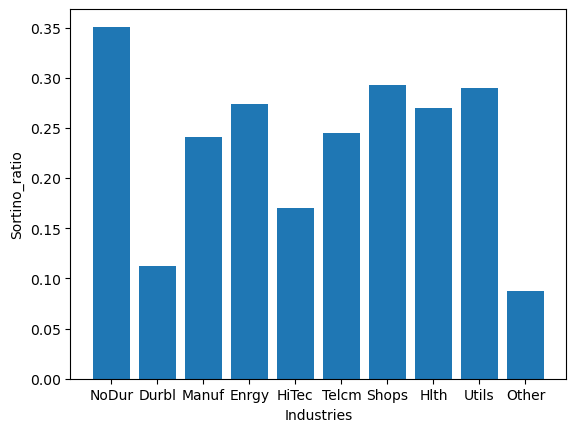

In [37]:
plt.bar(excess_return.columns,sortino)
plt.xlabel("Industries")
plt.ylabel("Sortino_ratio")
plt.show()

# 计算Jensen's alpha并画图

In [21]:
#要计算jensen's alpha，我们要知道rp(原始)，rf ,rm以及portfolio beta
#jensen's alpha = E(Rp-Rf)-βE(Rm-Rf)

In [22]:
jensen = (excess_return.mean())-alpha_beta_table["Beta"]*(data["Rm-Rf"].mean())
jensen_alpha = pd.DataFrame(jensen,columns=["Jensen's Alpha"])
jensen_alpha

,Jensen's Alpha
NoDur,0.369717
Durbl,-0.417903
Manuf,0.160494
Enrgy,0.504485
HiTec,-0.064024
Telcm,0.194348
Shops,0.274093
Hlth,0.236968
Utils,0.446523
Other,-0.387508


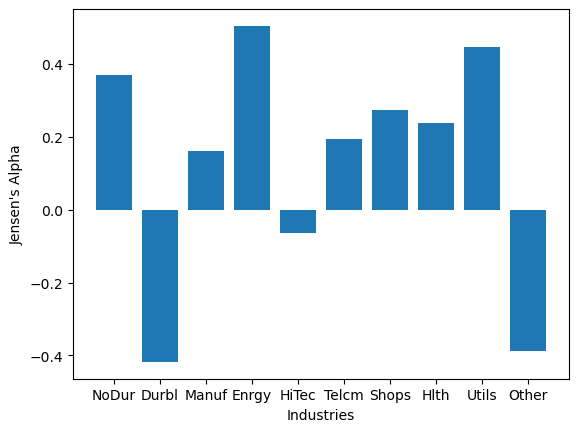

In [23]:
plt.bar(excess_return.columns,jensen)
plt.xlabel("Industries")
plt.ylabel("Jensen's Alpha")
plt.show()

# 计算Three Factor alpha并画图

In [24]:
#three factor alpha本质上是截距，Ri-Rf = alpha+beta*market risk+SMB+HML
#我们要做的就是拟合ri-rf，market risk,SMB,HML这三个因子，然后看他的截距是多少

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
X = data[["Rm-Rf","SMB","HML"]]

In [27]:
model = LinearRegression()

In [28]:
model.fit(X,excess_return)

LinearRegression()

In [29]:
intercept = model.intercept_
intercept

array([ 0.38670449, -0.47434183,  0.15328459,  0.52300699, -0.06597942,
        0.20072402,  0.25594107,  0.25747232,  0.47441058, -0.40441153])

In [30]:
intercept.shape

(10,)

In [31]:
excess_return.columns.shape

(10,)

In [32]:
tf_alpha = pd.DataFrame(intercept,index=excess_return.columns,columns=["Three-Factor α"])
tf_alpha

,Three-Factor α
NoDur,0.386704
Durbl,-0.474342
Manuf,0.153285
Enrgy,0.523007
HiTec,-0.065979
Telcm,0.200724
Shops,0.255941
Hlth,0.257472
Utils,0.474411
Other,-0.404412


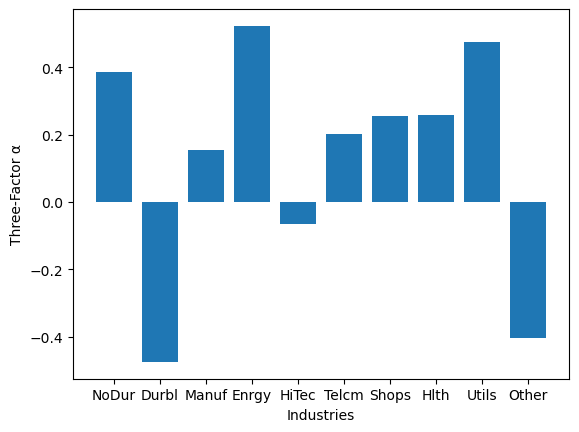

In [33]:
plt.bar(excess_return.columns,intercept)
plt.xlabel("Industries")
plt.ylabel("Three-Factor α")
plt.show()

In [38]:
performance_metrics = pd.concat([sharpe_ratio,treynor_ratio,sortino_ratio,jensen_alpha,tf_alpha],axis=1)
performance_metrics

,Sharpe_Ratio,Treynor_Ratio,Sortino_Ratio,Jensen's Alpha,Three-Factor α
NoDur,0.231099,1.186372,0.350804,0.369717,0.386704
Durbl,0.072356,0.367463,0.111967,-0.417903,-0.474342
Manuf,0.166616,0.758251,0.241260,0.160494,0.153285
Enrgy,0.181708,1.143330,0.273612,0.504485,0.523007
HiTec,0.118552,0.564295,0.170620,-0.064024,-0.065979
Telcm,0.169064,0.836363,0.244940,0.194348,0.200724
Shops,0.191753,0.951258,0.293032,0.274093,0.255941
Hlth,0.172529,0.971435,0.270294,0.236968,0.257472
Utils,0.210948,1.452334,0.290044,0.446523,0.474411
Other,0.064693,0.299781,0.087351,-0.387508,-0.404412
